In [97]:
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3

con=sqlite3.connect("chinook.db")
cursor = con.cursor()
sql="SELECT trackid,tracks.name,albums.Title AS album, media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;"

try:
    cursor.execute(sql)
    con.commit()
    print("Perfect,dude!")
except Exception as e:
    print("oh no!",e)
result = cursor.fetchall()


df = pd.DataFrame(result, columns=[ 
'Track_ID','Track_Name','Album_Titles','Media_Type','Genres'])
df.to_sql('result',con,if_exists="replace",index = False)
con.close()
df




Perfect,dude!


,Track_ID,Track_Name,Album_Titles,Media_Type,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [98]:
sql = "SELECT Genres,COUNT(*) AS number FROM result GROUP BY Genres ORDER BY number DESC;"

import pandas as pd
from matplotlib import pyplot as plt
import sqlite3

con=sqlite3.connect("chinook.db")
cursor = con.cursor()
try:
    cursor.execute(sql)
    con.commit()
    print("Perfect,dude!")
except Exception as e:
    print("oh no!",e)
    
result1 = cursor.fetchall()
df = pd.DataFrame(result1, columns=[ 
'Genre','Number'])
con.close()
df


Perfect,dude!


,Genre,Number
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


<ipython-input-73-798538cb019c>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


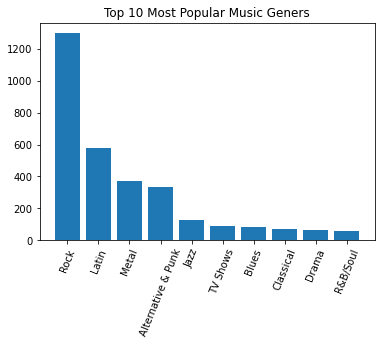

In [73]:
from matplotlib import pyplot as plt

a=result1[:10]
geners=[]
number=[]
#print(a)

for i in a:
    geners.append(i[0])
    number.append(i[1])
#print(geners)
#print(number)

plt.bar(range(len(Geners)),number)
ax = plt.subplot()
ax.set_xticks(range(len(Geners)))
ax.set_xticklabels(geners, rotation=68)
plt.title("Top 10 Most Popular Music Geners")
plt.show()